<a href="https://colab.research.google.com/github/dominiksakic/NETworkingMay/blob/main/04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("Data shape: ", train_data.shape)
print("Data example: ", train_data[0])
print("Label shape: ", train_targets.shape)
print("Label example: ", train_targets[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data shape:  (404, 13)
Data example:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Label shape:  (404,)
Label example:  15.2


In [16]:
# Normalize the data with training data!
# Dont leak the test data by using the test mean and std
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

print("Train data after normalization: ", train_data[0])

Train data after normalization:  [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [26]:
from tensorflow.keras import layers
from tensorflow import keras

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=["mae"])
  return model

In [30]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f'Processing fold #{i}')
  k_fold_lower_range = i * num_val_samples
  k_fold_upper_range = (i + 1) * num_val_samples
  print(f'Lower range: {k_fold_lower_range}')
  print(f'Upper range: {k_fold_upper_range}')

  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:k_fold_lower_range],
       train_data[k_fold_upper_range:]],axis=0)

  partial_train_targets = np.concatenate(
      [train_targets[:k_fold_lower_range],
       train_targets[k_fold_upper_range:]],axis=0)

  model = build_model()
  history = model.fit(
      partial_train_data, partial_train_targets,
      validation_data=(val_data, val_targets),
      epochs=num_epochs,
      batch_size=16,
      verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Lower range: 0
Upper range: 101
Processing fold #1
Lower range: 101
Upper range: 202
Processing fold #2
Lower range: 202
Upper range: 303
Processing fold #3
Lower range: 303
Upper range: 404


In [36]:
print("Example of mae histories: ", all_mae_histories[0][:10])

average_mae_history = [
  np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Example of mae histories:  [18.863012313842773, 15.096625328063965, 10.584558486938477, 6.300206661224365, 4.37882661819458, 3.7591428756713867, 3.444671630859375, 3.273793935775757, 3.1647777557373047, 3.0001609325408936]


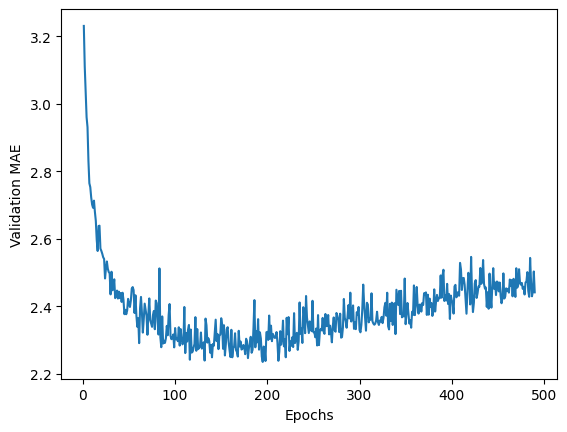

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()